<a href="https://colab.research.google.com/github/fcochaux/MINE-4101_Taller_1/blob/main/MINE-4101_Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 1 de Ciencia de Datos Aplicada

**Estudiante:** Francisco José Chaux Guzmán <br/>
**Código:** 202210155 <br/>
**Programa:** Maestría en Ingeniería de la Información

## Punto 1

_«Describa el conjunto de datos, tipos de variables y destaque cualquier problema de calidad de datos y procesos de limpieza que deba implementar.»_

Inicio con la carga de las librerías necesarias:

In [ ]:
# procesamiento

import numpy as np
import pandas as pd
import statistics

# visualización

import matplotlib.pyplot as plt
import seaborn as sns

A continuación, realizo la importación del conjunto de datos. Se identificaron los siguientes problemas al momento de importar:

1. Al intentar realizar la lectura de la forma estándar, con la coma como delimitador, surgió un error con una observación de 19 campos, siendo que por los títulos el programa identificaba 18 campos. La razón de este error es que en el campo `artist`, en el caso del rapero _Tyler, The Creator_, la coma interna genera que el programa la identifique como otro delimitador.
2. En el campo `genre`, en multiples ocasiones, sucede algo similar. En este caso, además de las comas internas, se identificaron problemas debido a que las comillas aparecían al inicio y final de las filas para observaciones con varios géneros musicales. Esto provocó que el programa identificara toda la fila como parte del campo `artist`.

Para solucionar estos problemas, se leyó la base de forma tal que evitara las observaciones con problemas (observaciones del problema 1). Esto permitió leer la base que, aunque sigue con errores, ya son más fáciles de solucionar. De esta forma, se conservan las observaciones correctas y se arreglan las que tienen errores (las observaciones del problema 2). Adicionalmente, se leyeron las observaciones que se evitaron en la lectura inicial (problema 1). Valga aclarar que se tuvo especial atención en tener la base con los formatos de variables adecuados.

Así, el procedimiento aplicado fue el siguiente:

In [ ]:
# base leída sin observaciones conflictivas
bruta = pd.read_csv('./data/Data_Taller_1.csv', on_bad_lines = 'skip')
# elimina el punto y coma en el nombre de la última columna
bruta.rename(columns = {'genre;':'genre'}, inplace = True)
# elimina el punto y coma en las observaciones de la última columna
bruta['genre'] = bruta['genre'].replace(';','', regex=True)
"""
Separación de la base en dos bases: con observaciones correctas
y con observaciones erróneas
"""
# base con observaciones correctas
spotify_df = bruta[bruta['song'].notnull()]
# base con observaciones a corregir
erroneas = bruta[bruta['song'].isnull()]
"""
Corrección de errores
"""
# eliminación de las comas internas que generan conflicto
corregidas = erroneas['artist'].replace(r', (?!(?:[^"]*"[^"]*")*[^"]*$)',
                                '|', regex=True)
# construcción de la base corregida a partir del delimitador
corregida = corregidas.str.split(',', expand=True)
# corrección de los nombres de las variables en la base corregida
corregida.columns = spotify_df.columns
# elimina comillas y punto y coma en la variable género
corregida['genre'] = corregida['genre'].replace(';','', regex=True)
corregida['genre'] = corregida['genre'].replace('"','', regex=True)
# corrección de variables que deben ser numéricas
corregida[['duration_ms', 'year','popularity',
           'danceability','energy','key','loudness',
           'mode','speechiness','acousticness',
           'instrumentalness','liveness','valence',
           'tempo']] = corregida[['duration_ms',
                                  'year','popularity',
           'danceability','energy','key','loudness',
           'mode','speechiness','acousticness',
           'instrumentalness','liveness','valence',
                                  'tempo']].apply(pd.to_numeric)
"""
Unión de base corregida
"""
# unión de ambas bases
spotify_df = pd.concat([spotify_df,corregida],
                       ignore_index=True)
"""
Lectura de observaciones no incluidas en lectura inicial
- El separador especificado es para que lea todo como una
  única columna
"""
# lectura
faltantes = pd.read_csv('./data/Data_Taller_1.csv', sep = '|',
                       header = None)
# selección de observación que falta, identificada a partir
# del error arrojado en la primera lectura
faltantes = faltantes.iloc[[1976]]
# correcciones
faltantes = faltantes.replace(r',(?!(?:[^"]*"[^"]*")*[^"]*$)',
                                '', regex=True)
faltantes = faltantes.replace('Tyler, The Creator',
                                'Tyler The Creator', regex=True)
faltantes = faltantes[0].str.split(',', expand=True)
faltantes.columns = spotify_df.columns
faltantes['genre'] = faltantes['genre'].replace(';','', regex=True)
faltantes[['duration_ms', 'year','popularity',
           'danceability','energy','key','loudness',
           'mode','speechiness','acousticness',
           'instrumentalness','liveness','valence',
           'tempo']] = faltantes[['duration_ms',
                                  'year','popularity',
           'danceability','energy','key','loudness',
           'mode','speechiness','acousticness',
           'instrumentalness','liveness','valence',
                                  'tempo']].apply(pd.to_numeric)
"""
Base definitiva
"""
# unión de ambas bases
spotify_df = pd.concat([spotify_df,faltantes],
                       ignore_index=True)
# revisión del resultado
spotify_df.sample(5)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
884,Elvis Presley,A Little Less Conversation - JXL Radio Edit Remix,211506.0,False,2002.0,60.0,0.597,0.970,4.0,-5.972,0.0,0.0502,0.000385,0.205000,0.133,0.717,114.999,rock|easy listening
1514,DEV,In The Dark,226226.0,False,2012.0,52.0,0.736,0.824,8.0,-4.231,1.0,0.0672,0.003580,0.000921,0.329,0.443,124.954,pop|Dance/Electronic
1824,Daya,"""Sit Still|Look Pretty""",202221.0,False,2016.0,1.0,0.657,0.739,2.0,-4.081,1.0,0.2740,0.141000,0.000000,0.178,0.543,181.994,rock|pop|Dance/Electronic
1525,DJ Fresh,Hot Right Now (feat. RITA ORA) - Radio Edit,182333.0,False,2012.0,58.0,0.524,0.972,4.0,-1.569,0.0,0.0431,0.006560,0.000580,0.224,0.476,175.017,pop|Dance/Electronic
1903,Migos,Walk It Talk It,276147.0,True,2018.0,75.0,0.907,0.633,2.0,-5.145,1.0,0.1840,0.087600,0.000003,0.106,0.395,145.914,hip hop|pop


A continuación, se revisan las principales características del conjunto de datos:

In [ ]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       1998 non-null   float64
 3   explicit          2000 non-null   object 
 4   year              2000 non-null   float64
 5   popularity        1997 non-null   float64
 6   danceability      1997 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   float64
 9   loudness          1999 non-null   float64
 10  mode              2000 non-null   float64
 11  speechiness       1999 non-null   float64
 12  acousticness      1997 non-null   float64
 13  instrumentalness  1999 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           1999 non-null   float64
 16  tempo             1998 non-null   float64


El conjunto de datos contiene 2.000 observaciones con 18 variables. Casi todas las variables son numéricas, exceptuando `artist`, `song`, `explicit` y `genre`. Adicionalmente, las variables `duration_ms`, `popularity`, `danceability`, `speechiness`, `acousticness`, `instrumentalness`, `valence` y `tempo` contienen de 1 a 3 valores faltantes.

### Variables categóricas

Las variables `artist` y `song` son de identificación, si bien es cierto que `artist` puede llegar a considerarse categórica si el análisis así lo requiere. La variable `explicit` parece ser categórica, por lo que se realiza una revisión de sus valores para saber si lo es:

In [ ]:
spotify_df.groupby('explicit', dropna=False)['explicit'].agg('count')

explicit
False    524
True     179
           1
False    924
True     372
Name: explicit, dtype: int64

Se comprueba que se trata de una variable booleana (no de identificación), pero se observa la repetición de las categorías `False` y `True`. Adicionalmente, se identifica un faltante que no había notado la función `info()`. Para determinar qué está pasando, se revisan los valores únicos:

In [ ]:
print(spotify_df['explicit'].unique())

[False True 'False' 'True' '']


Se observa que la variable mezcla datos booleanos con tipo texto. Para solucionar esto, se convierten los datos tipo texto a booleano:

In [ ]:
spotify_df['explicit'] = spotify_df['explicit'].map({
    'True': True, 'False': False, True: True, False: False
})

De esta forma, se arregla el problema del tipo de variable:

In [ ]:
spotify_df.groupby('explicit')['explicit'].agg('count')

explicit
False    1448
True      551
Name: explicit, dtype: int64

De cualquier forma, es importante hacer notar que queda el valor nulo identificado anteriormente:

In [ ]:
spotify_df['explicit'].isna().sum()

1

Pasando a la variable `genre`, la tabla de frecuencias correspondiente es la siguiente:

In [ ]:
spotify_df[['genre']].groupby('genre')['genre'] \
                             .count() \
                             .reset_index(name='count')

,genre,count
0,,1
1,Dance/Electronic,41
2,Folk/Acoustic|pop,2
3,Folk/Acoustic|rock,1
4,Folk/Acoustic|rock|pop,1
5,R&B,13
6,World/Traditional|Folk/Acoustic,1
7,World/Traditional|hip hop,2
8,World/Traditional|pop,1
9,World/Traditional|pop|Folk/Acoustic,2


La variable contiene muchas categorías y, en su mayoría, mezcla varios géneros. Esto ya se había visto en el proceso de importación. Adicionalmente, el valor `set()` es, evidentemente, un faltante.

El tratamiento que se realice a la variable dependerá del tipo de análisis que se vaya a realizar. Por esta razón, por ahora, el único tratamiento que se aplicará será el de convertir los casos de `set()` a nulo:

In [ ]:
spotify_df['genre'] = np.where(
    spotify_df['genre'] == 'set()', '', spotify_df['genre']
)
spotify_df[['genre']].groupby('genre')['genre'] \
                             .count() \
                             .reset_index(name='count')

,genre,count
0,,23
1,Dance/Electronic,41
2,Folk/Acoustic|pop,2
3,Folk/Acoustic|rock,1
4,Folk/Acoustic|rock|pop,1
5,R&B,13
6,World/Traditional|Folk/Acoustic,1
7,World/Traditional|hip hop,2
8,World/Traditional|pop,1
9,World/Traditional|pop|Folk/Acoustic,2


### Variables numéricas

El resumen estadístico de las variables numéricas es el siguiente:

In [ ]:
spotify_df.describe().applymap(lambda x: f"{x:,.2f}")

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,"1,998.00","2,000.00","1,997.00","1,997.00","2,000.00","2,000.00","1,999.00","2,000.00","1,999.00","1,997.00","1,999.00","2,000.00","1,999.00","1,998.00"
mean,"228,744.43","2,009.49",59.86,0.67,0.72,5.38,-5.51,0.55,0.10,0.13,0.02,0.18,0.55,120.10
std,"39,155.97",5.86,21.35,0.14,0.15,3.62,1.93,0.50,0.10,0.17,0.09,0.14,0.22,26.94
min,"113,000.00","1,998.00",0.00,0.13,0.05,0.00,-20.51,0.00,0.02,0.00,0.00,0.02,0.04,60.02
25%,"203,540.00","2,004.00",56.00,0.58,0.62,2.00,-6.49,0.00,0.04,0.01,0.00,0.09,0.39,98.99
50%,"223,259.50","2,010.00",65.00,0.68,0.74,6.00,-5.29,1.00,0.06,0.06,0.00,0.12,0.56,120.02
75%,"248,133.00","2,015.00",73.00,0.76,0.84,8.00,-4.17,1.00,0.13,0.18,0.00,0.24,0.73,134.19
max,"484,146.00","2,020.00",89.00,0.97,1.00,11.00,-0.28,1.00,0.58,0.98,0.98,0.85,0.97,210.85


Con base en el resumen y el diccionario, e destacan las siguientes características:

- Existen variables con valores de 0 a 1, las cuales representan características de las canciones en términos porcentuales. Por ejemplo, la variable `acousticness` con valor de 0.98 indicaría que la canción tiene elementos acústicos a un nivel del 98%.
- Resulta curioso que la variable `loudness` tenga valores negativos. La razón es que los decibiles con los que se mide tienen  valores de -60 a 0 decibeles.
- La variable `popularity` parece tratarse de una escala de 0 a 100, donde 100 es lo más popular. Esto no aparecía en especificado en el diccionario proveído, por lo que se buscó y encontró la forma en que se construyó la variable en el siguiente enlace: https://count.co/notebook/kGJ3skS05g5.
- La variable `key` parece ser una medida de clase de tonos de las canciones. Está construida de forma tal que, por ejemplo, 0 = C, 1 = C♯/D♭, 2 = D, etc. Si no tiene clave detectada, aparece como -1. De esta forma, se deduce que, en realidad, esta variable es de tipo categórica.
- Finalmente, no parecen haber distribuciones muy sesgadas, almenos a juzgar por la comparación entre la media y la mediana. Sin embargo, si parecen haber datos atípicos juzgando por la comparación entre el percentil 75 y el máximo.

Con base en la revisión, se corrige la variable `key`. Los valores únicos son los siguientes:

In [ ]:
sorted(spotify_df['key'].unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0]

Así, la corrección es la siguiente:

In [ ]:
spotify_df['key'] = spotify_df['key'].map({
    0:'C', 1:'C#/Db', 2:'D', 3:'D#/Eb', 4:'E', 5:'F', 6:'F#/Gb',
    7:'G', 8:'G#/Ab', 9:'A', 10:'A#/Bb', 11: 'B'
})
print(spotify_df['key'].unique())

['C#/Db' 'G#/Ab' 'F' 'F#/Gb' 'G' 'B' 'A#/Bb' 'C' 'E' 'D' 'D#/Eb' 'A']


## Punto 2

_«¿Cuál es el top 10 de artistas más activos de los últimos 10 años?»_

Para responder la pregunta, se deben hacer las siguientes operaciones:

- Filtrar las canciones de los últimos 10 años (2010-2020).
- Contar el número de veces que se repite cada artista.

De esta forma, se obtiene lo siguiente:

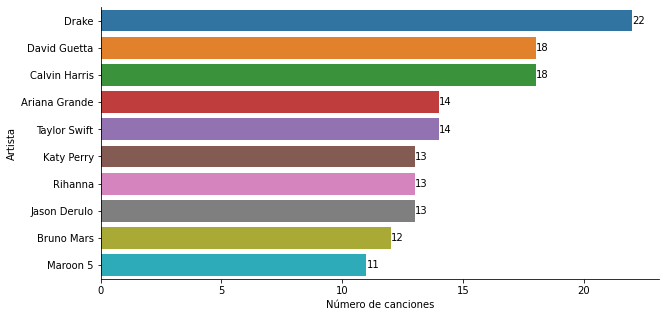

In [ ]:
# base filtrada para los años requeridos
filtrada = spotify_df[spotify_df['year'] >= 2010]
# cálculo de los 5 artistas más activos
filtrada = filtrada[['artist']].groupby(['artist'])['artist'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(10)
# grafica el resultado
fig, ax1 = plt.subplots(figsize=(10, 5))
filtrada.columns = ['Artista', 'Número de canciones']
ax = sns.barplot(x = 'Número de canciones', y = 'Artista',
                 data = filtrada, ax = ax1)
ax.bar_label(ax.containers[0])
sns.despine(fig)

Así, se puede identificar que los artistas más activos durante los últimos 10 años, es decir, con mayor número de canciones, fueron los siguientes:

- **Drake:** cantante, rapero y actor canadiense.
- **David Guetta:** DJ y productor musical francés.
- **Calvin Harris:** DJ, productor musical y cantautor escocés.
- **Ariana Grande:** cantautora y actriz estadounidense.
- **Taylor Swift:** cantautora estadounidense.
- **Katy Perry:** cantautora y personalidad de televisión estadounidense.
- **Rihanna:** cantante, actriz y mujer de negocios estadounidense.
- **Jason Derulo:** cantautor estadounidense.
- **Bruno Mars:** cantautor, productor, músico, bailarín y director de videos musicales estadounidense.
- **Maroon 5:** banda estadounidense de pop rock.

## Punto 3

_«¿Cómo se diferencian las canciones de los géneros de Latin y Folk/Acoustic en relación con su duración? Halle la diferencia del tiempo promedio de ambos géneros.»_

Para responder esta pregunta, se deben identificar los casos en los que por lo menos uno de los géneros del artista sea Latin o Folk/Acoustic. Para poderlo hacer de forma efectiva, esto es, evitando los casos en los cuales la palabra aparece en mayúscula en un caso y en minúscula en otro, se convierten todos los textos de la columna a minúscula:

In [ ]:
# conversión de textos a minúsculas
spotify_df['genre'] = spotify_df['genre'].map(lambda x: x.lower())

Una vez convertido todo a minúscula, se crean variables de identificación para cada género:

In [ ]:
# variable para el género latin
spotify_df['latin'] = np.where(spotify_df['genre'].str.contains('latin'), 1, 0)
# variable para el género folk/acoustic
spotify_df['folk/acoustic'] = np.where(spotify_df['genre'].str.contains('folk/acoustic'), 1, 0)

Verifico si hay casos de canciones con ambos géneros al tiempo:

In [ ]:
len(spotify_df[(spotify_df['latin'] == 1) & (spotify_df['folk/acoustic'] == 1)])

0

Como no hay casos de canciones con ambos géneros, se procede con el código para responder cálcular la diferencia:

In [ ]:
lat = np.mean(spotify_df[spotify_df['latin'] == 1]['duration_ms'])
fa = np.mean(spotify_df[spotify_df['folk/acoustic'] == 1]['duration_ms'])
print(f'Tiempo promedio de Latin: {lat:,.0f} milisegundos')
print(f'Tiempo promedio de Folk/Acoustic: {fa:,.0f} milisegundos')
print(f'Diferencia: {abs(lat - fa):,.0f} milisegundos')

Tiempo promedio de Latin: 227,675 milisegundos
Tiempo promedio de Folk/Acoustic: 220,184 milisegundos
Diferencia: 7,491 milisegundos


Entonces, podemos afirmar que, en promedio, las canciones del género Latin son más extensas que las del género Folk/Acoustic por casi 7,500 milisegundos.

De forma gráfica, se puede realizar la comparación de las distribuciones:

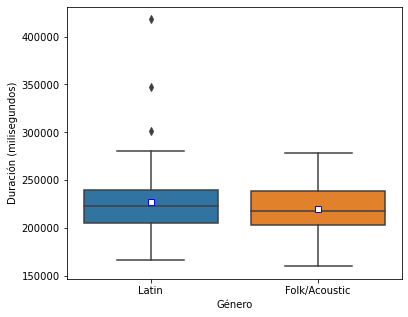

In [ ]:
genero1 = spotify_df[spotify_df['latin'] == 1][['duration_ms']]
genero1['Género'] = 'Latin'
genero2 = spotify_df[spotify_df['folk/acoustic'] == 1][['duration_ms']]
genero2['Género'] = 'Folk/Acoustic'
generos = pd.concat([genero1,genero2], ignore_index=True)
generos['Duración (milisegundos)'] = generos['duration_ms']
fig, ax1 = plt.subplots(figsize=(6, 5))
ax = sns.boxplot(x='Género', y='Duración (milisegundos)',
                 data=generos, ax=ax1, showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white",
                       "markeredgecolor":"blue"})

Se observa que las distribuciones se parecen, aunque el género `Latin` tiene casos atípicos de canciones de duración más alarga. Adicionalmente, se grafica el promedio y, tal como se calculó, se ve que mayor el de `Latin`.

## Punto 4

_«Halle el top 5 de los géneros del 2019 según la cantidad de canciones. ¿Cómo ha variado la cantidad de canciones del Top de géneros en los años 2000, 2005, 2010, 2015, 2019?»_

Para responder esta pregunta, se requiere realizar un tratamiento adicional de la variable `genre`. Se escogió generar una columna identificadora por género. Para poderlo hacer, se inició con la identificación de casos únicos:

In [ ]:
# separación de la variable a partir del delimitador generado
generos = spotify_df['genre'].str.split('|', expand=True)
# todos los géneros en una columna y generación de casos únicos
generos = pd.concat([generos[0],generos[1],generos[2],generos[3]],axis=0).unique()
# eliminación de géneros que no aportan
generos = generos[generos != ""]
generos = generos[generos != None]
# impresión de los géneros encontrados
for k in generos:
    print(k)

pop
hip hop
dance/electronic
metal
r&b
rock
latin
country
easy listening
folk/acoustic
world/traditional
blues
classical
jazz


A partir de los géneros identificados, se generan las columnas:

In [ ]:
for k in generos:
    print(k)
    spotify_df[k] = np.where(spotify_df['genre'].str.contains(k), 1, 0)
spotify_df[generos].head()

pop
hip hop
dance/electronic
metal
r&b
rock
latin
country
easy listening
folk/acoustic
world/traditional
blues
classical
jazz


,pop,hip hop,dance/electronic,metal,r&b,rock,latin,country,easy listening,folk/acoustic,world/traditional,blues,classical,jazz
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Así, se realiza la suma de cada una de las variables generadas y se filtran los mayores valores:

In [ ]:
filtrada = spotify_df[spotify_df['year'] == 2019]
filtrada[generos].sum()\
                   .reset_index(name='count') \
                   .sort_values(['count'], ascending=False) \
                   .head(5)

,index,count
0,pop,63
1,hip hop,38
2,dance/electronic,21
4,r&b,9
6,latin,8


Por lo tanto, el top 5 de los géneros del 2019 según la cantidad de canciones fue el siguiente:
1. Pop.
2. Hip hop.
3. Dance/electronic.
4. R&B.
5. Latin.

A continuación, se revisan las cantidades de canciones para estos géneros durante los años 2000, 2005, 2010, 2015 y 2019. Para esto, se suman las columnas agrupadas por año:

In [ ]:
top = ['pop','hip hop', 'dance/electronic', 'r&b', 'latin']
filtrada = spotify_df.loc[spotify_df['year'].isin([2000, 2005, 2010, 2015,2019])]
sumas = filtrada.groupby(['year'], as_index = False)[top].apply(lambda x : x.astype(int).sum())
sumas

,year,pop,hip hop,dance/electronic,r&b,latin
0,2000.0,57,21,5,25,3
1,2005.0,81,51,5,31,3
2,2010.0,97,54,28,23,2
3,2015.0,89,33,28,21,0
4,2019.0,63,38,21,9,8


Para visualizar mejor el resultado, realizo la gráfica:

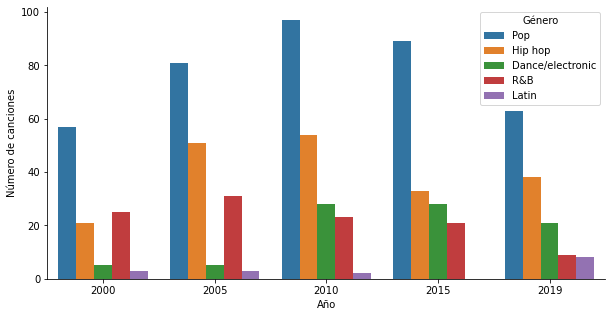

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))
tidy = sumas.melt(id_vars='year').rename(columns=str.title)
tidy.columns = ['Año', 'Género', 'Número de canciones']
tidy['Género'] = tidy['Género'].replace(
    ['pop', 'hip hop', 'dance/electronic', 'r&b', 'latin'],
    ['Pop', 'Hip hop', 'Dance/electronic', 'R&B', 'Latin']
)
tidy['Año'] = tidy['Año'].astype(int)
ax = sns.barplot(x='Año', y='Número de canciones',
                 hue='Género', data=tidy, ax=ax1)
sns.despine(fig) 

Se evidencia que para todos los años, el género pop tuvo la mayor cantidad de canciones. En muchos casos el orden entre géneros es similar, con el hip hop siguiendo al pop, y así siguiendo con dance/electronic, R&B y Latin. Este orden fue diferente para los años 2000 y 2005.

## Punto 5

_«¿Cómo ha sido la progresión de nuevos artistas? Asuma que un artista nuevo es aquel del cual no se tiene registros pasados y solo es nuevo durante el primer año de aparición.»_

Se elabora el gráfico de línea que permite ver la serie de nuevos artistas de acuerdo al criterio asumido:

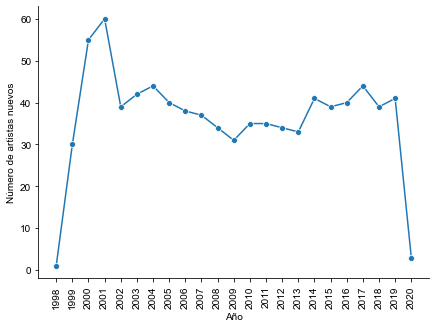

In [ ]:
nuevos_artistas = pd.DataFrame({'artist' : [], 'year': []})
for k in spotify_df['artist'].unique():
    nuevos_artistas1 = spotify_df[['artist','year']]
    nuevos_artistas1 = nuevos_artistas1[
        nuevos_artistas1['artist'] == k
    ]
    nuevos_artistas1 = nuevos_artistas1[
        nuevos_artistas1['year'] == min(nuevos_artistas1['year'])
    ]
    nuevos_artistas = pd.concat([nuevos_artistas,nuevos_artistas1], ignore_index=True)
nuevos_artistas = nuevos_artistas.drop_duplicates()
progresion = nuevos_artistas.groupby(['year'])['artist'] \
                             .count() \
                             .reset_index(name='count')
progresion['Año'] = progresion['year'].astype(int)
progresion['Número de artistas nuevos'] = progresion['count']
fig, ax1 = plt.subplots(figsize=(7, 5))
sns.set_theme(style="darkgrid")
ax = sns.lineplot(x='Año', y='Número de artistas nuevos',
             data=progresion, marker='o', axes = ax1)
ax.set_xticks(range(1998,2021))
plt.xticks(rotation=90)
sns.despine(fig)

Se observa cómo el número de artistas nuevos se incrementó de forma continua hasta 2001, luego de lo cual disminuyeron en 2002 para pasar a tener un comportamiento un poco más estacionario. Para 2020 este valor disminuyó radicalmente, lo que hace pensar que el conjunto de datos tiene datos parciales para 2020.

## Punto 6

_«Grafique la progresión de la popularidad promedio por género y por año. Concluya sobre la gráfica, ej: ¿existen tendencias?»_

Debido a dificultades para visualizar, solo se hace la visualización de los 5 géneros con más canciones:

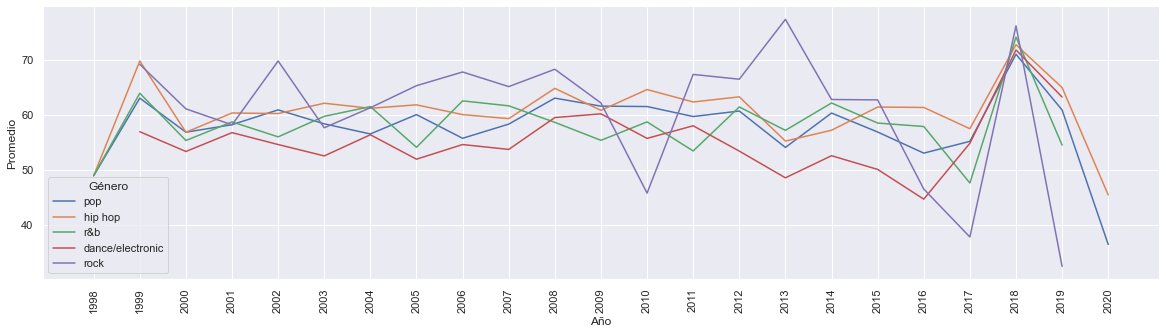

In [ ]:
spotify_df['year'] = spotify_df['year'].astype(int)
popu = pd.DataFrame({'Promedio' : [], 'Género': [], 'Año': []})
generos_escogidos = spotify_df[generos].sum()\
                   .reset_index(name='count') \
                   .sort_values(['count'], ascending=False) \
                   .head(5)
generos_escogidos = generos_escogidos['index']
for k in generos_escogidos:
    for t in range(1998, 2021):
        popu1 = spotify_df[(spotify_df[k] == 1) & (spotify_df['year'] == t)].groupby(k)['popularity'].mean() \
                                              .reset_index(name='Promedio')
        popu1['Género'] = k
        popu1['Año'] = t
        popu1.drop(k, axis = 1, inplace=True)
        popu = pd.concat([popu,popu1], ignore_index=True)
fig, ax1 = plt.subplots(figsize=(20, 5))
popu['Año'] = popu['Año'].astype(int)
ax = sns.lineplot(x='Año', y='Promedio',
                 hue='Género', data=popu, ax=ax1)
ax.set_xticks(range(1998,2021))
plt.xticks(rotation=90)
sns.despine(fig)

Lo que se observa es que, exceptuando por algunos casos concretos como el salto del rock en 2013 y su caída en 2017, no se obseva una tendencia clara pues casi todas las series son estacionarias. Sin embargo, se observa una caída que deber ser provocada, como se mencionó antes, por la poca cantidad de datos para 2020.

## Punto 7

_«Compare los géneros Pop y Rock según sus características de: energy, valence y tempo. Concluya sobre su análisis.»_

Para comparar las características requeridas de los géneros pop y rock, se grafican los diagramas de caja de cada una diferenciada por género:

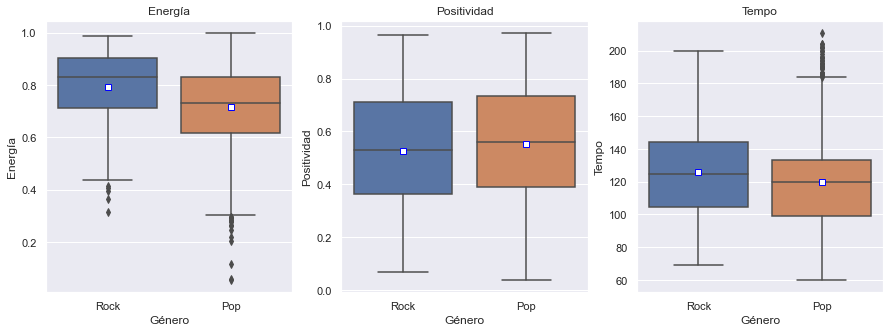

In [ ]:
figure, axis = plt.subplots(1, 3, figsize=(15, 5))
genero1 = spotify_df[spotify_df['rock'] == 1][[
    'energy', 'valence', 'tempo'
]]
genero1['Género'] = 'Rock'
genero2 = spotify_df[spotify_df['pop'] == 1][[
    'energy', 'valence', 'tempo'
]]
genero2['Género'] = 'Pop'
generos = pd.concat([genero1,genero2], ignore_index=True)
generos['Energía'] = generos['energy']
generos['Positividad'] = generos['valence']
generos['Tempo'] = generos['tempo']

#sns.boxplot(ax=axes[0, 0], data=iris, x='species', y='petal_width')
sns.boxplot(x='Género', y='Energía',
                 data=generos, ax=axis[0], showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white",
                       "markeredgecolor":"blue"})
sns.boxplot(x='Género', y='Positividad',
                 data=generos, ax=axis[1], showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white",
                       "markeredgecolor":"blue"})
sns.boxplot(x='Género', y='Tempo',
                 data=generos, ax=axis[2], showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"white",
                       "markeredgecolor":"blue"})
axis[0].set_title('Energía')
axis[1].set_title('Positividad')
axis[2].set_title('Tempo')
sns.despine(fig)

De esta forma, se observa lo siguiente:
- El género rock tiene, en general, canciones más enérgicas. Por esta razón, el promedio es mayor y la distribución de la variable para el género está sesgada a valores más altos, por encima del 0.4 la mayor parte de las veces. El pop, por su parte, aunque también abarca estos valores, tiene un sesgo menos marcado y sus canciones cubren valores más amplios, llegando a tener unos cuantos casos atípicos de canciones poco enérgicas.
- La positividad (`valence`) para ambos géneros es bastante similar, mostrando en ambos casos una distribución bastante simétrica y sin valores atípicos. No obstante, el promedio para pop es mayor.
- El tempo de las canciones de rock es, en general, más alto que el de las canciones de pop. En el caso de este segundo género, de hecho, las canciones con tempo más alto son consideradas atípicas. Se observa un sesgo hacia los valores más bajos, mientras que el tempo del rock tiende a ser un poco más simétrico en comparación. Lo anterior se refleja en un promedio más alto para el rock.

## Punto 8

_«Plantee una pregunta de negocio de su interés, ya sea por tipo de música, artistas u otra dimensión, mediante la cual se analicen al menos 3 variables del dataset y concluya.»_

Una pregunta de interés personal es si es posible caracterizar una canción tipica de un género a partir de variables como la clave, el modo y el tempo más tipico de las canciones. Para responderla, se elige hacer el análisis con los siguientes géneros: metal, hip hop, dance/electronica y folk/acoustic.

Antes de hacer el análisis, se hace una transformación de la variable modo:

In [ ]:
spotify_df['mode'] = spotify_df['mode'].map({
    0:'Menor', 1:'Mayor'
})

El cuadro que permite responder la pregunta se genera a continuación:

In [ ]:
generos = ['metal','hip hop','dance/electronic','folk/acoustic']
promedios = pd.DataFrame({'Género' : [], 'Clave': [], 
                         'Tempo' : [], 'Modo': []})
for k in generos:
    filtrada = spotify_df[spotify_df[k] == 1]
    promedios1 = [[k,
               statistics.mode(filtrada['key']),
                   statistics.mode(filtrada['mode']),
               filtrada['tempo'].mean()
              ]]
    promedios1 = pd.DataFrame(
        promedios1,
        columns=['Género', 'Clave', 'Modo', 'Tempo']
    )
    promedios = pd.concat([promedios,promedios1],
                          ignore_index=True)
promedios['Género'] = promedios['Género'].map({
    'metal':'Metal',
    'hip hop':'Hip hop',
    'dance/electronic':'Dance/electronic',
    'folk/acoustic':'Folk/acoustic'
})
promedios

,Género,Clave,Tempo,Modo
0,Metal,E,124.612136,Mayor
1,Hip hop,C#/Db,117.998067,Mayor
2,Dance/electronic,G,124.177836,Mayor
3,Folk/acoustic,D#/Eb,110.348050,Mayor


Se nota que, en promedio, las canciones de metal tienen una tonalidad de mi mayor, de hip hop de do sostenido mayor, de dance/electronic sol mayor y de folk/acoustic re sostenido mayor. Adicionalmente, los tempos de metal y dance/electronic son los mayores y bastante cercanos, siendo los más lentos los de folk/acoustic. Finalmente, ningún caso mostró una moda de modo menor.

A continuación, se realizan los histogramas del tempo:

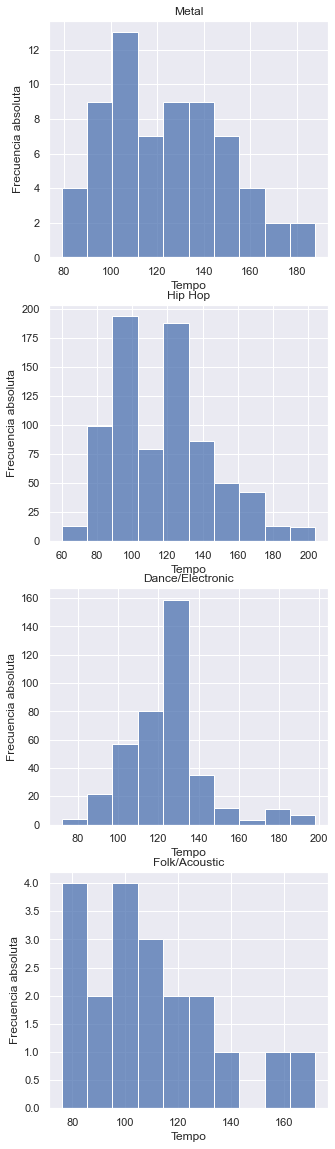

In [ ]:
figure, axis = plt.subplots(4, 1, figsize=(5, 20))
r = -1
for k in generos:
    r = r + 1
    filtrada = spotify_df[spotify_df[k] == 1]
    sns.histplot(x='tempo', data=filtrada, ax=axis[r], bins = 10)
    axis[r].set_title(k.title())
    axis[r].set_xlabel('Tempo')
    axis[r].set_ylabel('Frecuencia absoluta')

La mayor parte de las distribuciones son un poco sesgadas a la izquierda, pero en el caso de folk/acoustic este sesgo es todavía más fuerte.

Los diagramas de barra para la clave son los siguientes:

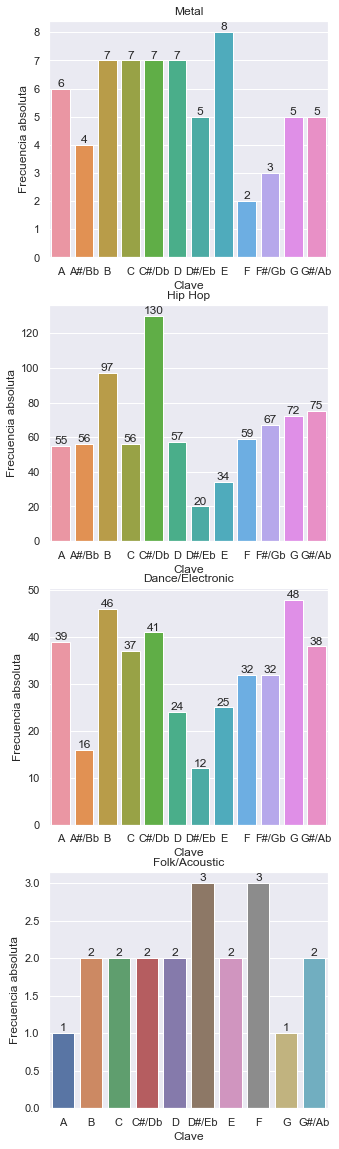

In [ ]:
figure, axis = plt.subplots(4, 1, figsize=(5, 20))
r = -1
for k in generos:
    r = r + 1
    filtrada = spotify_df[spotify_df[k] == 1].groupby(['key'])['key'] \
                             .count() \
                             .reset_index(name='count')
    sns.barplot(x='key', y='count', data=filtrada, ax=axis[r])
    axis[r].bar_label(axis[r].containers[0])
    axis[r].set_title(k.title())
    axis[r].set_xlabel('Clave')
    axis[r].set_ylabel('Frecuencia absoluta')

En la mayoría de casos, el número de claves es bastante variado. Sin embargo, en algunos casos se ven repeticiones de la misma frecuencia para varias claves, como es el caso del metal y el folk/acoustic.

Finalmente, se revisan los diagramas de barras del modo:

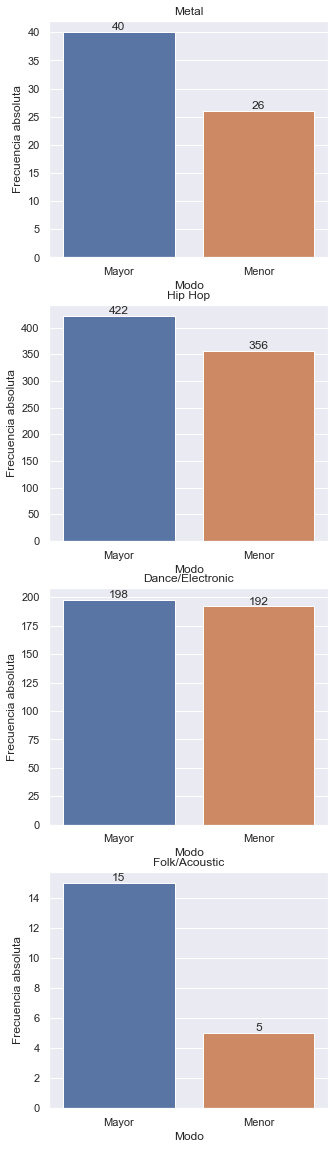

In [ ]:
figure, axis = plt.subplots(4, 1, figsize=(5, 20))
r = -1
for k in generos:
    r = r + 1
    filtrada = spotify_df[spotify_df[k] == 1].groupby(['mode'])['mode'] \
                             .count() \
                             .reset_index(name='count')
    sns.barplot(x='mode', y='count', data=filtrada, ax=axis[r])
    axis[r].bar_label(axis[r].containers[0])
    axis[r].set_title(k.title())
    axis[r].set_xlabel('Modo')
    axis[r].set_ylabel('Frecuencia absoluta')

En este caso, lo destacable es que la relación entre modo mayor y modo menor es bastante equilibrada para el caso de dance/electronica y el caso más desequilibrado es el de folk/acoustic, con sesgo hacia el modo mayor.

Al revisar el caso de otros géneros, se nota que hay muy casos casos para ejemplos como el jazz. Así, es evidente que la base de datos proveía es muy pequeña para determinados análisis, ya que suceden casos como el del jazz o el del año 2020. Por lo tanto, para análisis más complejos sería bueno tener muchos más datos.